# Problem Set 1
## Protostars and Planets (AST 7939)

Alyssa Bulatek \
January 24, 2022

### 5. Numerical Integration

In [47]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

plt.rc('text', usetex = True) # Use LaTeX font in plots
plt.rc('font', family = 'serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage{gensymb}'
plt.rcParams.update({'font.size': 12})
display_dpi = 150

In [43]:
def derivatives(xi, psi):
    return [psi[1], ((-2 * psi[1])/xi) + np.exp(-psi[0])]

xi0 = 1e-4
psi0 = [xi0**2/6, xi0/3]
xi = np.linspace(xi0, 8, 50)

sol = solve_ivp(derivatives, t_span = [xi0, 8], y0 = [0, 0], t_eval = xi)
psi, psi_prime = sol['y'][0], sol['y'][1]

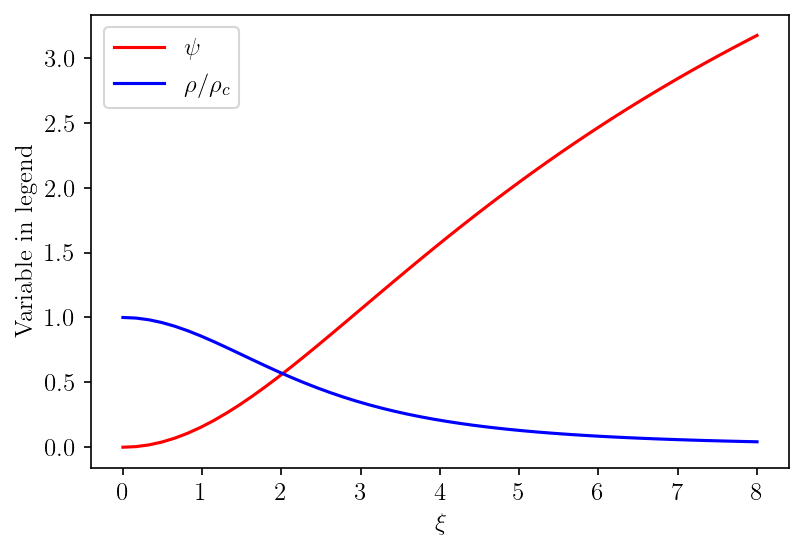

In [53]:
fig = plt.figure(dpi = display_dpi)
plt.plot(xi, psi, label = r'$\psi$', color = 'r')
plt.plot(xi, np.exp(-psi), label = r'$\rho/\rho_c$', color = 'b')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\xi$')
plt.ylabel('Variable in legend')
plt.savefig("part5.pdf", dpi = 300, facecolor='w', edgecolor='w')
plt.show()

### 7. Dimensionless Mass and Density Contrast

In [ ]:
nondim_mass = M/((c_s^4)/np.sqrt((G**3)*P_s))
nondim_contrast = np.exp(-psi_s)